<a href="https://colab.research.google.com/github/st4rmy/ML/blob/main/Kopia_notatnika_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
Name: count, dtype: int64
Survived  Age 
0         21.0    19
          28.0    18
          18.0    17
          25.0    17
          19.0    16
                  ..
1         37.0     1
          53.0     1
          47.0     1
          55.0     1
          80.0     1
Name: count, Length: 142, dtype: int64
    Cabin
2    <NA>
890  <NA>
    Cabin
2    <NA>
890  <NA>


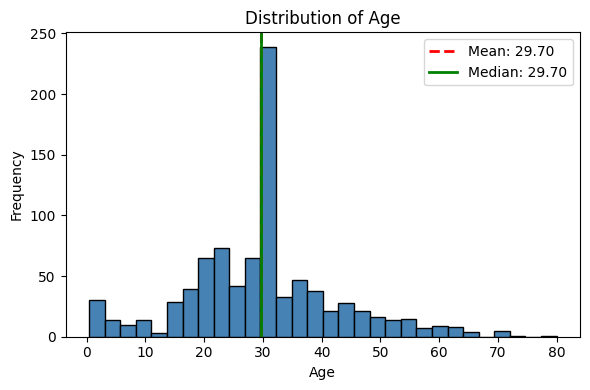

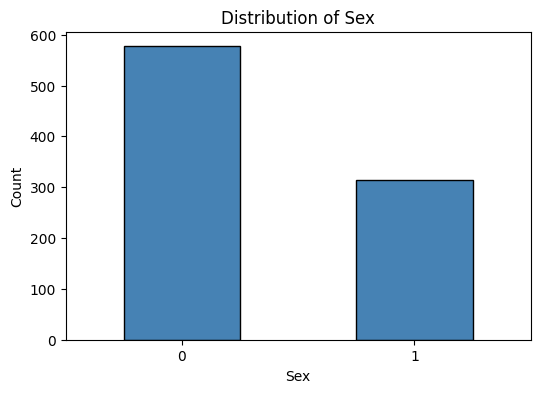

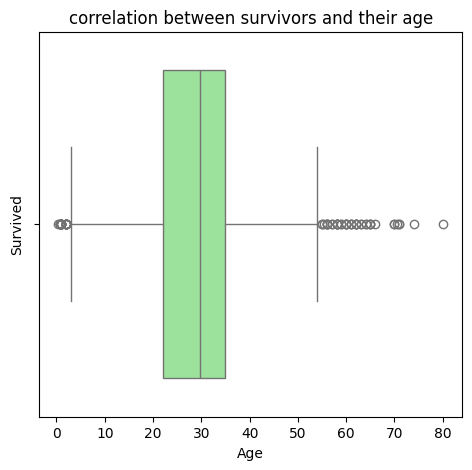

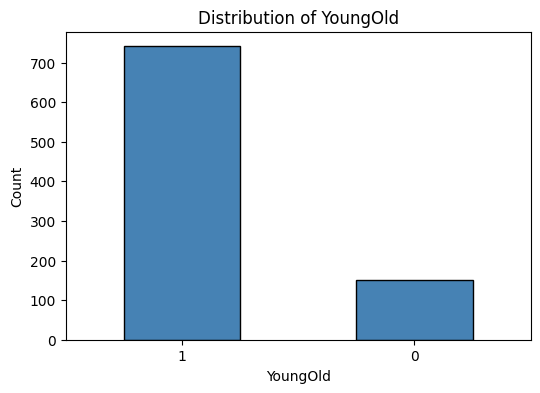

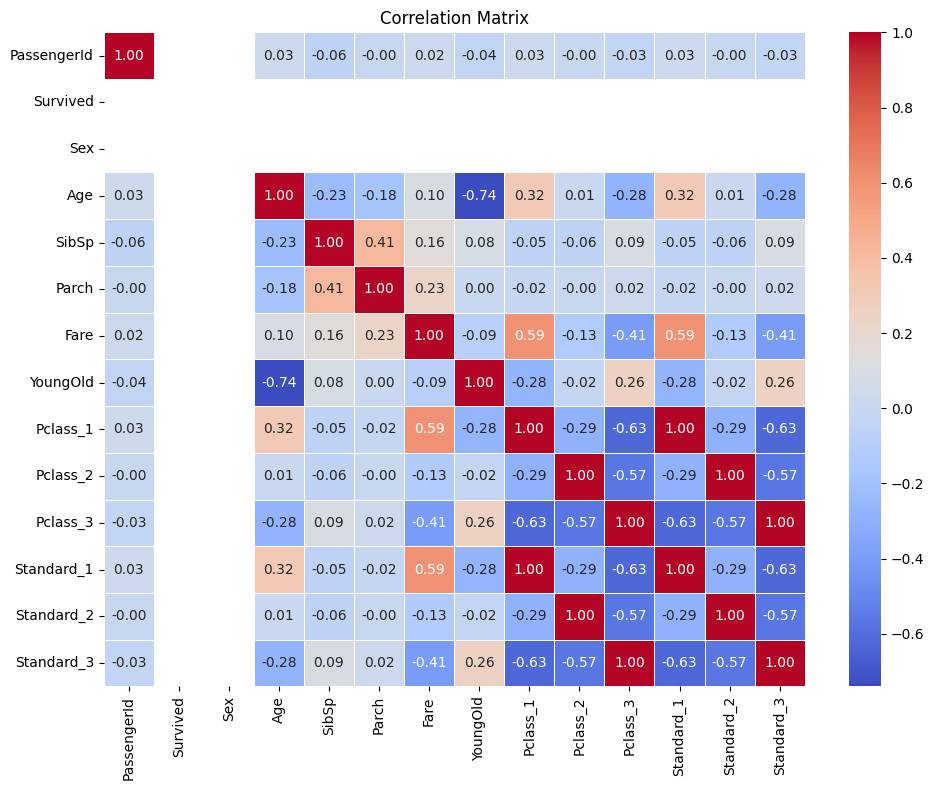

In [ ]:
from collections.abc import Sequence
from pathlib import Path
base_path = Path('/content/titanic.csv')
 #Rozpoczynam pisanie kodu od wczytania udostępnionych wcześniej danych dotyczących pasażerów Titanic-a
import pandas as pd
import numpy as np
titanic_data = pd.read_csv(base_path )
titanic_data.head()
list = titanic_data.loc[[2,890], 'Age']

 # Zamieniam typ danych w kolumnie "Age" na liczby całkowite ze względu na kategorię, do której zostały one przypisane

df = pd.DataFrame(list, columns = ['Age'])
df = df.astype({'Age' : 'int'})
list = titanic_data.loc[[2,890], 'Ticket']

# Zamieniam dane znajdujące się w kolumnie "Ticket" na ciąg znaków. Podobnie dzieje się z kolumną "Cabin"

df = pd.DataFrame(list, columns = ['Ticket'] )
df = df.astype({'Ticket' : 'string'})
list = titanic_data.loc[[2, 890], 'Cabin']
df = pd.DataFrame(list, columns = ['Cabin'])
df = df.astype({'Cabin' : 'string'})

# Nie wszystie kolumny są istotne w kontekście zadania. Jeżeli naszym celem jest ustalenie, które osoby miały szansę przeżyć, to takie kolumny jak:
#"Name", "Ticket", "Sibsp", "Parch", "Fare", "Cabin" czy "Embarked" nam nie pomogą, ponieważ te dane nie wpływają na szanse otrzymane przez pasażerów
#topiącego się statku. Pozostałe kolumny mają jednak większe znaczenie.


survived_sex_counts = titanic_data[['Survived', 'Sex']].value_counts()
print(survived_sex_counts)

#Chcemy zobaczyć jaki wpływ miała płeć pasażera, na fakt czy przeżył on katastrofę, czy nie.
#Na podstawie wyników wyświetlonych poniżej możemy stwierdzić, że znacznie więcej kobiet przetrwało katastrofę w stosunku do mężczyzn.

survived_age_counts = titanic_data[['Survived', 'Age']].value_counts()
print(survived_age_counts)

#Podobnie badamy zależność wieku od tego, czy danej osobie udało się przeżyć. Okazuje się, co możemy zaobserwować w poniższych wynikach, że największe szanse na
# przetrwanie miały osoby młode. Pojawiają się jednak pojedyncze przypadki, w których osoby zaliczające się do grona ocalałych nie należą do młodej grupy pasażerów.
#Są to tzw. outlinery, czyli wartości skrajne, pojedyncze przypadki nie wpisujące się w shemat.
# Obliczamy średnią wieku osoby, która miała największe sszanse na przeżycie. W rezultacie otrzymujemy wynik 29/30 lat.

titanic_data.groupby('Survived')[['Age']].mean()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
age_values = titanic_data[['Age']]
age_imputed = imputer.fit_transform(age_values)
titanic_data['Age']= age_imputed
age_in_range = (titanic_data.Age > 20) & (titanic_data.Age < 40)
titanic_data.loc[age_in_range]

# Wśród danych zapisanyh w kolumnie "Age" pojawiają się braki lub odchylenia.
#Aby to naprawić, należy w puste miejsca powpisywać średnią wartość wieku wszystkich pasażerów oraz odrzucic wartości znacznie wykraczające poza średnią.

titanic_data.Sex.unique()
titanic_data['Sex'] = titanic_data.Sex.map({
    'female': 1, 'male': 0
})
titanic_data['Sex'].value_counts()

#Aby móc wykonać wykres należy przypisać danym kategorycznym konkretne wartości.
#Dzięki temu, jesteśmy w stanie otrzymać wykres przedstawiający ilość danych z konkretnej kategorii.

titanic_data['YoungOld']= np.where(titanic_data['Age']> 40, 'Old', 'Young')
print(df)
titanic_data.YoungOld.unique()
titanic_data['YoungOld'] = titanic_data.YoungOld.map({
    'Young': 1, 'Old': 0
})
titanic_data['YoungOld'].value_counts()

#Na podstawie danych zebranych z kolumny "Age", możemy stworzyć nową rubrykę w oparciu o wiek pasażerów.
#Mając na względzie fakt, że najwięcej osób przeżyło takich, których wiek mieścił się w przedziale (20; 40)
# przyporządkowujemy kolejnym osobom konkretną kategorię w oparciu o ich wiek.

titanic_data['Standard'] = titanic_data['Pclass'].map({1: 'high', 2: 'medium', 3: 'low'})
print(df)
titanic_data.Standard.unique()
titanic_data['Standard']= titanic_data.Standard.map({
    'low': 3, 'medium': 2, 'high':1
})
titanic_data['Standard'].value_counts()

#Tworzymy nową kolumnę obrazującą standardy pasażerów płynących statkiem opartą o numer klasy.
#Dzięki temu jesteśmy w stanie sprawdzić, czy te wiadomości miały jakiś wpływ na szanse przeżycia konkretnej osoby.
import matplotlib.pyplot as plt
def plot_numeric_histogram(df, column_name):
    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_numeric_histogram(titanic_data, 'Age')

#Tworzymy wykres obrazujący rozkład wieku pasażerów.
#Na jego podstawie możemy stwierdzić, że prawdopodobnie jest to rozkład Gaussa, gdyż wartości skupiają się głownie wokół średniej.
#Im wartości bardziej oddchylone od średniej tym jest ich mniej.

Q1 = titanic_data['Age'].quantile(0.25)
Q3 = titanic_data['Age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

#Następnie należy usunąć wartości znacznie odbiegające od średniej, żeby skutecznie przefiltrować dane.

def plot_categorical_column(df, column_name):

    counts = df[column_name].value_counts()

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

plot_categorical_column(titanic_data, 'Sex')

#Tworzymy wykres, żeby sprawdzić, czy znacznie różniła się liczba mężczyzn w stosunku do ilości kobiet.


titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1}) #Zamieniamy wartości kategorialne na numeryczne.
titanic_data['Survived'] = titanic_data['Survived'].map({'no': 0, 'yes': 1})
titanic_data = pd.get_dummies(titanic_data, columns = ['Pclass'])
import seaborn as sns
df = titanic_data[['Age', 'Survived', 'Sex']].copy()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('correlation between survivors and their age')
plt.xlabel('Age')
plt.ylabel('Survived')
Q1 = titanic_data['Age'].quantile(0.25)
Q3 = titanic_data['Age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

#Tworzymy wykres pudełkowy zależności osób, które przeżyły od ich wieku.
#Na jego podstawie możemy stwierdzić, że największe szanse na przeżycie miały osoby, których wiek zawierał się w przedziale (20;35), choć zdarzały się również odstępstwa od tej reguły.

def plot_categorical_column(df, column_name):

    counts = df[column_name].value_counts()

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

plot_categorical_column(titanic_data, 'YoungOld')
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Survived'] = titanic_data['Survived'].map({'no': 0, 'yes': 1})

titanic_data = pd.get_dummies(titanic_data, columns=['Standard'], drop_first=False)

def plot_correlation_matrix(df):

    corr = df.corr(numeric_only=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()


plot_correlation_matrix(titanic_data)

#Na koniec tworzymy heatmapę, żeby zobaczyć jak poszczególne kategorię wpływają na siebie wzajemnie.

#Reasumując, po przetworzeniu udostępnionych danych dotyczących Titanica możemy stwierdzić, że największą szansę na przeżycie miały kobiety w wieku 20-35 lat.
#Finalnie status pasażera nie wpłynął na szanse na przeżycie, podobnie jak inne dane należące do wymienionych wcześniej kolumn.

